<a href="https://colab.research.google.com/github/Gauravkeny/Cats-and-Dogs-Prediction/blob/main/House_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRFRegressor 
from sklearn.linear_model import Lasso

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing_train.csv to housing_train.csv


In [ ]:
import io
from io import StringIO
data = pd.read_csv(io.BytesIO(uploaded['housing_train.csv']))

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Brunswick,52 Evans St,3,h,1650000,S,Nelson,5.2,3056,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland
1,Reservoir,85 Radford Rd,5,h,791000,S,Ray,11.2,3073,4.0,3.0,1.0,961.0,NaN,NaN,Darebin
2,Newport,99 Anderson St,3,h,785000,S,RT,8.4,3015,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay
3,Brighton East,4/377 South Rd,2,u,755000,SP,Buxton,10.7,3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hawthorn East,3 Jaques St,5,h,2500000,VB,RT,7.5,3123,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara


In [ ]:
data.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Distance           0
Postcode           0
Bedroom2        1559
Bathroom        1559
Car             1559
Landsize        1564
BuildingArea    4209
YearBuilt       3717
CouncilArea     1564
dtype: int64

In [ ]:
data.shape

(7536, 16)

In [ ]:
data.dtypes

Suburb           object
Address          object
Rooms             int64
Type             object
Price             int64
Method           object
SellerG          object
Distance        float64
Postcode          int64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
dtype: object

In [ ]:
k = data['SellerG'].value_counts()
SellerG = k.index[k.values>100]
SellerG

Index(['Nelson', 'Jellis', 'hockingstuart', 'Barry', 'Marshall', 'Buxton',
       'Ray', 'Biggin', 'Brad', 'Woodards', 'Fletchers', 'RT', 'Greg', 'Miles',
       'Sweeney', 'Jas', 'Gary'],
      dtype='object')

In [ ]:
for val in SellerG:
  name = 'SellerG' + '_' + val
  data[name] = (data['SellerG'] == val).astype(int)

del data['SellerG']

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,SellerG_Nelson,SellerG_Jellis,SellerG_hockingstuart,SellerG_Barry,SellerG_Marshall,SellerG_Buxton,SellerG_Ray,SellerG_Biggin,SellerG_Brad,SellerG_Woodards,SellerG_Fletchers,SellerG_RT,SellerG_Greg,SellerG_Miles,SellerG_Sweeney,SellerG_Jas,SellerG_Gary
0,Brunswick,52 Evans St,3,h,1650000,S,5.2,3056,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Reservoir,85 Radford Rd,5,h,791000,S,11.2,3073,4.0,3.0,1.0,961.0,NaN,NaN,Darebin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Newport,99 Anderson St,3,h,785000,S,8.4,3015,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Brighton East,4/377 South Rd,2,u,755000,SP,10.7,3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Hawthorn East,3 Jaques St,5,h,2500000,VB,7.5,3123,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data['Suburb'].nunique()

142

In [ ]:
k = data['Suburb'].value_counts()
Suburb = k.index[k.values>100]

for val in Suburb:
  name = 'Suburb' + '_' + val
  data[name] = (data['Suburb'] == val).astype(int)

del data['Suburb']

In [ ]:
data.head()

,Address,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,SellerG_Nelson,SellerG_Jellis,SellerG_hockingstuart,SellerG_Barry,SellerG_Marshall,SellerG_Buxton,SellerG_Ray,SellerG_Biggin,SellerG_Brad,SellerG_Woodards,SellerG_Fletchers,SellerG_RT,SellerG_Greg,SellerG_Miles,SellerG_Sweeney,SellerG_Jas,SellerG_Gary,Suburb_Reservoir,Suburb_Bentleigh East,Suburb_Richmond,Suburb_Preston,Suburb_St Kilda,Suburb_South Yarra,Suburb_Brunswick,Suburb_Glenroy,Suburb_Essendon,Suburb_Brighton,Suburb_Glen Iris,Suburb_Coburg,Suburb_Hawthorn,Suburb_Northcote,Suburb_Kew,Suburb_Brighton East,Suburb_Balwyn North
0,52 Evans St,3,h,1650000,S,5.2,3056,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,85 Radford Rd,5,h,791000,S,11.2,3073,4.0,3.0,1.0,961.0,NaN,NaN,Darebin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,99 Anderson St,3,h,785000,S,8.4,3015,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4/377 South Rd,2,u,755000,SP,10.7,3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3 Jaques St,5,h,2500000,VB,7.5,3123,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
del data['Address']

In [ ]:
del data['Postcode']

In [ ]:
data.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,SellerG_Nelson,SellerG_Jellis,SellerG_hockingstuart,SellerG_Barry,SellerG_Marshall,SellerG_Buxton,SellerG_Ray,SellerG_Biggin,SellerG_Brad,SellerG_Woodards,SellerG_Fletchers,SellerG_RT,SellerG_Greg,SellerG_Miles,SellerG_Sweeney,SellerG_Jas,SellerG_Gary,Suburb_Reservoir,Suburb_Bentleigh East,Suburb_Richmond,Suburb_Preston,Suburb_St Kilda,Suburb_South Yarra,Suburb_Brunswick,Suburb_Glenroy,Suburb_Essendon,Suburb_Brighton,Suburb_Glen Iris,Suburb_Coburg,Suburb_Hawthorn,Suburb_Northcote,Suburb_Kew,Suburb_Brighton East,Suburb_Balwyn North
0,3,h,1650000,S,5.2,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,h,791000,S,11.2,4.0,3.0,1.0,961.0,NaN,NaN,Darebin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,h,785000,S,8.4,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,u,755000,SP,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,h,2500000,VB,7.5,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

Rooms                       0
Type                        0
Price                       0
Method                      0
Distance                    0
Bedroom2                 1559
Bathroom                 1559
Car                      1559
Landsize                 1564
BuildingArea             4209
YearBuilt                3717
CouncilArea              1564
SellerG_Nelson              0
SellerG_Jellis              0
SellerG_hockingstuart       0
SellerG_Barry               0
SellerG_Marshall            0
SellerG_Buxton              0
SellerG_Ray                 0
SellerG_Biggin              0
SellerG_Brad                0
SellerG_Woodards            0
SellerG_Fletchers           0
SellerG_RT                  0
SellerG_Greg                0
SellerG_Miles               0
SellerG_Sweeney             0
SellerG_Jas                 0
SellerG_Gary                0
Suburb_Reservoir            0
Suburb_Bentleigh East       0
Suburb_Richmond             0
Suburb_Preston              0
Suburb_St 

In [ ]:
data['Type'].value_counts()

h    4718
u    1982
t     836
Name: Type, dtype: int64

In [ ]:
data['Type_h'] = (data['Type'] == 'h').astype(int)
data['Type_u'] = (data['Type'] == 'u').astype(int)

del data['Type']

data.head()

,Rooms,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,SellerG_Nelson,SellerG_Jellis,SellerG_hockingstuart,SellerG_Barry,SellerG_Marshall,SellerG_Buxton,SellerG_Ray,SellerG_Biggin,SellerG_Brad,SellerG_Woodards,SellerG_Fletchers,SellerG_RT,SellerG_Greg,SellerG_Miles,SellerG_Sweeney,SellerG_Jas,SellerG_Gary,Suburb_Reservoir,Suburb_Bentleigh East,Suburb_Richmond,Suburb_Preston,Suburb_St Kilda,Suburb_South Yarra,Suburb_Brunswick,Suburb_Glenroy,Suburb_Essendon,Suburb_Brighton,Suburb_Glen Iris,Suburb_Coburg,Suburb_Hawthorn,Suburb_Northcote,Suburb_Kew,Suburb_Brighton East,Suburb_Balwyn North,Type_h,Type_u
0,3,1650000,S,5.2,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,5,791000,S,11.2,4.0,3.0,1.0,961.0,NaN,NaN,Darebin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,785000,S,8.4,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,755000,SP,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,5,2500000,VB,7.5,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
data['Method'].value_counts()

S     4894
PI     979
SP     932
VB     703
SA      28
Name: Method, dtype: int64

In [ ]:
data['Method_S'] = (data['Method'] == 'S').astype(int)
data['Method_PI'] = (data['Method'] == 'PI').astype(int)
data['Method_SP'] = (data['Method'] == 'SP').astype(int)

del data['Method']

data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,SellerG_Nelson,SellerG_Jellis,SellerG_hockingstuart,SellerG_Barry,SellerG_Marshall,SellerG_Buxton,SellerG_Ray,SellerG_Biggin,SellerG_Brad,SellerG_Woodards,SellerG_Fletchers,SellerG_RT,SellerG_Greg,SellerG_Miles,SellerG_Sweeney,SellerG_Jas,SellerG_Gary,Suburb_Reservoir,Suburb_Bentleigh East,Suburb_Richmond,Suburb_Preston,Suburb_St Kilda,Suburb_South Yarra,Suburb_Brunswick,Suburb_Glenroy,Suburb_Essendon,Suburb_Brighton,Suburb_Glen Iris,Suburb_Coburg,Suburb_Hawthorn,Suburb_Northcote,Suburb_Kew,Suburb_Brighton East,Suburb_Balwyn North,Type_h,Type_u,Method_S,Method_PI,Method_SP
0,3,1650000,5.2,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5,791000,11.2,4.0,3.0,1.0,961.0,NaN,NaN,Darebin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,3,785000,8.4,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,2,755000,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,5,2500000,7.5,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.loc[data['CouncilArea'].isnull(),'CouncilArea'] = 'missing'

In [ ]:
data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,SellerG_Nelson,SellerG_Jellis,SellerG_hockingstuart,SellerG_Barry,SellerG_Marshall,SellerG_Buxton,SellerG_Ray,SellerG_Biggin,SellerG_Brad,SellerG_Woodards,SellerG_Fletchers,SellerG_RT,SellerG_Greg,SellerG_Miles,SellerG_Sweeney,SellerG_Jas,SellerG_Gary,Suburb_Reservoir,Suburb_Bentleigh East,Suburb_Richmond,Suburb_Preston,Suburb_St Kilda,Suburb_South Yarra,Suburb_Brunswick,Suburb_Glenroy,Suburb_Essendon,Suburb_Brighton,Suburb_Glen Iris,Suburb_Coburg,Suburb_Hawthorn,Suburb_Northcote,Suburb_Kew,Suburb_Brighton East,Suburb_Balwyn North,Type_h,Type_u,Method_S,Method_PI,Method_SP
0,3,1650000,5.2,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5,791000,11.2,4.0,3.0,1.0,961.0,NaN,NaN,Darebin,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,3,785000,8.4,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,2,755000,10.7,NaN,NaN,NaN,NaN,NaN,NaN,missing,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,5,2500000,7.5,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
data['CouncilArea'].value_counts()

missing          1564
Boroondara        635
Moreland          609
Moonee Valley     536
Darebin           517
Glen Eira         475
Stonnington       433
Maribyrnong       372
Yarra             368
Port Phillip      362
Banyule           282
Melbourne         266
Bayside           246
Hobsons Bay       234
Brimbank          197
Manningham        151
Whitehorse        113
Monash            112
Kingston           54
Hume               10
Name: CouncilArea, dtype: int64

In [ ]:
k = data['CouncilArea'].value_counts()
Councilarea = k.index[k.values>350]

for val in Councilarea:

  name = 'CouncilArea' + '_' + val
  data[name] = (data['CouncilArea'] == val).astype(int)

del data['CouncilArea']

data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,SellerG_Nelson,SellerG_Jellis,SellerG_hockingstuart,SellerG_Barry,SellerG_Marshall,SellerG_Buxton,SellerG_Ray,SellerG_Biggin,SellerG_Brad,SellerG_Woodards,SellerG_Fletchers,SellerG_RT,SellerG_Greg,SellerG_Miles,SellerG_Sweeney,SellerG_Jas,SellerG_Gary,Suburb_Reservoir,Suburb_Bentleigh East,Suburb_Richmond,Suburb_Preston,Suburb_St Kilda,Suburb_South Yarra,Suburb_Brunswick,Suburb_Glenroy,Suburb_Essendon,Suburb_Brighton,Suburb_Glen Iris,Suburb_Coburg,Suburb_Hawthorn,Suburb_Northcote,Suburb_Kew,Suburb_Brighton East,Suburb_Balwyn North,Type_h,Type_u,Method_S,Method_PI,Method_SP,CouncilArea_missing,CouncilArea_Boroondara,CouncilArea_Moreland,CouncilArea_Moonee Valley,CouncilArea_Darebin,CouncilArea_Glen Eira,CouncilArea_Stonnington,CouncilArea_Maribyrnong,CouncilArea_Yarra,CouncilArea_Port Phillip
0,3,1650000,5.2,3.0,1.0,2.0,495.0,141.0,1920.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,5,791000,11.2,4.0,3.0,1.0,961.0,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,785000,8.4,3.0,1.0,1.0,185.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2,755000,10.7,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
4,5,2500000,7.5,5.0,3.0,3.0,757.0,240.0,1925.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'SellerG_Nelson', 'SellerG_Jellis',
       'SellerG_hockingstuart', 'SellerG_Barry', 'SellerG_Marshall',
       'SellerG_Buxton', 'SellerG_Ray', 'SellerG_Biggin', 'SellerG_Brad',
       'SellerG_Woodards', 'SellerG_Fletchers', 'SellerG_RT', 'SellerG_Greg',
       'SellerG_Miles', 'SellerG_Sweeney', 'SellerG_Jas', 'SellerG_Gary',
       'Suburb_Reservoir', 'Suburb_Bentleigh East', 'Suburb_Richmond',
       'Suburb_Preston', 'Suburb_St Kilda', 'Suburb_South Yarra',
       'Suburb_Brunswick', 'Suburb_Glenroy', 'Suburb_Essendon',
       'Suburb_Brighton', 'Suburb_Glen Iris', 'Suburb_Coburg',
       'Suburb_Hawthorn', 'Suburb_Northcote', 'Suburb_Kew',
       'Suburb_Brighton East', 'Suburb_Balwyn North', 'Type_h', 'Type_u',
       'Method_S', 'Method_PI', 'Method_SP', 'CouncilArea_missing',
       'CouncilArea_Boroondara', 'CouncilArea_Moreland',
       'CouncilArea_Moonee Val

In [ ]:
data.isnull().sum()

Rooms                           0
Price                           0
Distance                        0
Bedroom2                     1559
Bathroom                     1559
Car                          1559
Landsize                     1564
BuildingArea                 4209
YearBuilt                    3717
SellerG_Nelson                  0
SellerG_Jellis                  0
SellerG_hockingstuart           0
SellerG_Barry                   0
SellerG_Marshall                0
SellerG_Buxton                  0
SellerG_Ray                     0
SellerG_Biggin                  0
SellerG_Brad                    0
SellerG_Woodards                0
SellerG_Fletchers               0
SellerG_RT                      0
SellerG_Greg                    0
SellerG_Miles                   0
SellerG_Sweeney                 0
SellerG_Jas                     0
SellerG_Gary                    0
Suburb_Reservoir                0
Suburb_Bentleigh East           0
Suburb_Richmond                 0
Suburb_Preston

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


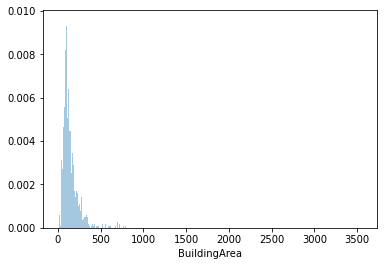

In [ ]:
sns.distplot(data['BuildingArea'],kde=False,norm_hist=True,bins=1000)

In [ ]:
data.loc[data['BuildingArea'].isnull(),'BuildingArea'] = data['BuildingArea'].median()
data.loc[data['Bedroom2'].isnull(),'Bedroom2'] = data['Bedroom2'].median()
data.loc[data['Bathroom'].isnull(),'Bathroom'] = data['Bathroom'].median()
data.loc[data['Car'].isnull(),'Car'] = data['Car'].median()
data.loc[data['Landsize'].isnull(),'Landsize'] = data['Landsize'].median()

del data['YearBuilt']

In [ ]:
data.isnull().sum()

Rooms                        0
Price                        0
Distance                     0
Bedroom2                     0
Bathroom                     0
Car                          0
Landsize                     0
BuildingArea                 0
SellerG_Nelson               0
SellerG_Jellis               0
SellerG_hockingstuart        0
SellerG_Barry                0
SellerG_Marshall             0
SellerG_Buxton               0
SellerG_Ray                  0
SellerG_Biggin               0
SellerG_Brad                 0
SellerG_Woodards             0
SellerG_Fletchers            0
SellerG_RT                   0
SellerG_Greg                 0
SellerG_Miles                0
SellerG_Sweeney              0
SellerG_Jas                  0
SellerG_Gary                 0
Suburb_Reservoir             0
Suburb_Bentleigh East        0
Suburb_Richmond              0
Suburb_Preston               0
Suburb_St Kilda              0
Suburb_South Yarra           0
Suburb_Brunswick             0
Suburb_G

In [ ]:
data.dtypes

Rooms                          int64
Price                          int64
Distance                     float64
Bedroom2                     float64
Bathroom                     float64
Car                          float64
Landsize                     float64
BuildingArea                 float64
SellerG_Nelson                 int64
SellerG_Jellis                 int64
SellerG_hockingstuart          int64
SellerG_Barry                  int64
SellerG_Marshall               int64
SellerG_Buxton                 int64
SellerG_Ray                    int64
SellerG_Biggin                 int64
SellerG_Brad                   int64
SellerG_Woodards               int64
SellerG_Fletchers              int64
SellerG_RT                     int64
SellerG_Greg                   int64
SellerG_Miles                  int64
SellerG_Sweeney                int64
SellerG_Jas                    int64
SellerG_Gary                   int64
Suburb_Reservoir               int64
Suburb_Bentleigh East          int64
S

In [ ]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [ ]:
y = np.log(y)

In [ ]:
lambdas = np.linspace(0.5,3,200)
Lasso_params = {'alpha':lambdas}

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model = Lasso(fit_intercept = True)

In [ ]:
grid_search = GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error',verbose=True)
grid_search.fit(x,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   35.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.316...
        8.91457286,  8.95979899,  9.00502513,  9.05025126,  9.09547739,
        9.14070352,  9.18592965,  9.23115578,  9.27638191,  9.32160804,
        9.36683417,  9.4120603 ,  9.45728643,  9.50251256,  9.54773869,
        9.59296482,  9.63819095,  9.68341709,  9.72864322,  9.77386935,
        9.81909548,  9.86432161,  9.90954774,  9.95477387, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_abso

In [ ]:
grid_search.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lambdas = np.linspace(0.5,3,200)
Lasso_params = {'alpha':lambdas}
model = Lasso(fit_intercept = True)
grid_search = GridSearchCV(model,param_grid=Lasso_params,cv=10,scoring='neg_mean_absolute_error',verbose=True,n_jobs=-1)
grid_search.fit(x,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   16.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.5       , 0.51256281, 0.52512563, 0.53768844, 0.55025126,
       0.56281407, 0.57537688, 0.5879...
       2.69849246, 2.71105528, 2.72361809, 2.7361809 , 2.74874372,
       2.76130653, 2.77386935, 2.78643216, 2.79899497, 2.81155779,
       2.8241206 , 2.83668342, 2.84924623, 2.86180905, 2.87437186,
       2.88693467, 2.89949749, 2.9120603 , 2.92462312, 2.93718593,
       2.94974874, 2.96231156, 2.97487437, 2.98743719, 3.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=True)

In [ ]:
grid_search.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lambdas = np.linspace(0.01,1,200)
Lasso_params = {'alpha':lambdas}
model = Lasso(fit_intercept = True)
grid_search = GridSearchCV(model,param_grid=Lasso_params,cv=10,scoring='neg_mean_absolute_error',verbose=1000,n_jobs=-1)
grid_search.fit(x,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   17.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.01      , 0.01497487, 0.01994975, 0.02492462, 0.0298995 ,
       0.03487437, 0.03984925, 0.0448...
       0.88060302, 0.88557789, 0.89055276, 0.89552764, 0.90050251,
       0.90547739, 0.91045226, 0.91542714, 0.92040201, 0.92537688,
       0.93035176, 0.93532663, 0.94030151, 0.94527638, 0.95025126,
       0.95522613, 0.96020101, 0.96517588, 0.97015075, 0.97512563,
       0.9801005 , 0.98507538, 0.99005025, 0.99502513, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=True)

In [ ]:
grid_search.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lambdas = np.linspace(0.001,0.05,200)
Lasso_params = {'alpha':lambdas}
model = Lasso(fit_intercept = True)
grid_search = GridSearchCV(model,param_grid=Lasso_params,cv=10,scoring='neg_mean_absolute_error',verbose=1000,n_jobs=-1)
grid_search.fit(x,y)

In [ ]:
grid_search.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lambdas = np.linspace(0.00001,0.05,500)
Lasso_params = {'alpha':lambdas}
model = Lasso(fit_intercept = True)
grid_search = GridSearchCV(model,param_grid=Lasso_params,cv=10,scoring='neg_mean_absolute_error',verbose=1000,n_jobs=-1)
grid_search.fit(x,y)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0541s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1392s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.10180361e-04, 2.10360721e-04, 3.10541082e-04,
       4.10721443e-04, 5...
       4.84972946e-02, 4.85974749e-02, 4.86976553e-02, 4.87978357e-02,
       4.88980160e-02, 4.89981964e-02, 4.90983768e-02, 4.91985571e-02,
       4.92987375e-02, 4.93989178e-02, 4.94990982e-02, 4.95992786e-02,
       4.96994589e-02, 4.97996393e-02, 4.98998196e-02, 5.00000000e-02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1000)

In [ ]:
grid_search.best_estimator_

Lasso(alpha=0.00011018036072144289, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
Lasso_reg = grid_search.best_estimator_

In [ ]:
Lasso_reg.fit(x,y)

Lasso(alpha=0.00011018036072144289, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
list(zip(x.columns,Lasso_reg.coef_))

[('Rooms', 0.22987842177548648),
 ('Distance', -0.038709565396794154),
 ('Bedroom2', -0.018240011541913733),
 ('Bathroom', 0.08308721747050443),
 ('Car', 0.042735023476239836),
 ('Landsize', 7.784795256327332e-06),
 ('BuildingArea', 0.00032305654852173563),
 ('SellerG_Nelson', -0.02769288429863644),
 ('SellerG_Jellis', 0.1311357695788589),
 ('SellerG_hockingstuart', 0.0),
 ('SellerG_Barry', -0.05945926831386732),
 ('SellerG_Marshall', 0.25940732256151966),
 ('SellerG_Buxton', 0.14468132937437814),
 ('SellerG_Ray', -0.0012866087195352554),
 ('SellerG_Biggin', -0.04347106217166428),
 ('SellerG_Brad', -0.058255714541377485),
 ('SellerG_Woodards', 0.06610269909651269),
 ('SellerG_Fletchers', 0.12094960234674823),
 ('SellerG_RT', 0.11877616429590168),
 ('SellerG_Greg', 0.012243730057708431),
 ('SellerG_Miles', 0.03632982966350987),
 ('SellerG_Sweeney', -0.14822849122347354),
 ('SellerG_Jas', -0.04468335107029606),
 ('SellerG_Gary', -0.0009169704868218355),
 ('Suburb_Reservoir', -0.255818238

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv = cross_val_score(Lasso_reg,x,y,cv=10,scoring='neg_mean_absolute_error')

In [ ]:
np.abs(cv.mean())

0.22515797372137786

In [ ]:
x.shape[1]

56

In [ ]:
rf_params = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
             'max_features':[5,10,15,20,25,30,35,40,45,50],
             'max_depth':[5,10,15,20,25,30,35,40],
             'min_samples_leaf':[10,20,30,40,50],
             'min_samples_split':[10,20,30,40,50],
             'bootstrap':[True,False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()

In [ ]:
random_search_rf = RandomizedSearchCV(model,param_distributions = rf_params,cv=10,n_iter=50,scoring='neg_mean_absolute_error',verbose = 1000,n_jobs=-1)

In [ ]:
random_search_rf.fit(x,y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [ ]:
random_search_rf.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf = random_search_rf.best_estimator_

In [ ]:
rf.fit(x,y)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(rf,x,y,cv=10,scoring='neg_mean_absolute_error')
cv.mean()

-0.1876883470422038

In [ ]:
gbm_params = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
              'max_features':[5,10,15,20,25,30,35,40,45,50],
              'max_depth':[1,2,3,4,5,6,7,8,9],
              'subsample':[0.5,0.8,1],
              'learning_rate':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
random_search_gbm = RandomizedSearchCV(model,scoring='neg_mean_absolute_error',param_distributions=gbm_params,
                                       cv=10,n_iter=50,verbose = 10000,n_jobs=-1)

In [ ]:
random_search_gbm.fit(x,y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [ ]:
random_search_gbm.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=5,
                          max_features=30, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbm_model = random_search_gbm.best_estimator_

In [ ]:
gbm_model.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=5,
                          max_features=30, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
cv_gbm = cross_val_score(gbm_model,x,y,cv=10,scoring='neg_mean_absolute_error')
cv_gbm.mean()

-0.16493357220100657